# Analisa Data Penumpang Penerbangan

Temukan data yang menurut kalian menarik pada http://data.go.id . Buat analisa data yang berisi:
1. Deskripsi data
2. Statistik tentang data
3. Visualisasi sederhana
4. Narasi analisis

------
## Descriptive Analysis Airlines Pessenger
*Mukti Setyaji* <br>
*23-Oct-2018*

* **1. Introduction**
    * 1.1 Dataset
    * 1.2 Objective
* **2. Data Exploration**
* **3. Basic Statistic**
* **4. Data Visualization***
* **5. Conclusion**
* **6. Future Work**

### 1. Introduction
#### 1.1 Dataset
[The Dataset](https://data.go.id/dataset/jumlah-penumpang-yang-berangkat-pada-penerbangan-domestik) we used are about the total of airlines pessenger in Indonesia (nationaly). It has three feature:
1. Tahun
2. Bulan
3. Total_Pessenger
4. Airport

#### 1.2 Objective
1. What was the total pessenger from 2006 to august 2018?
2. What airport 
3. ?

### 2. Data Exploration

In [47]:
# import every package that we're going to use
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
color = sns.color_palette()

# check what inside folder
os.listdir("./data/airline")

['jumlah-penumpang-penerbangan-internasional.csv',
 'info',
 'produksi-perusahaan-penerbangan-luar-negeri.csv',
 'jumlah-penumpang-penerbangan-domestik.csv',
 'produksi-perusahaan-penerbangan-dalam-negeri.csv']

In [48]:
# Store path
dataset = "./data/airline/jumlah-penumpang-penerbangan-domestik.csv"

# Create Dataframe
df = pd.read_csv(dataset, delimiter=';')

# Check dataframe information
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
nama_variabel                  760 non-null object
nama_variabel_turunan          760 non-null object
nama_tahun                     760 non-null int64
nama_turunan_tahun             760 non-null object
data_content                   760 non-null int64
nama_item_vertical_variabel    760 non-null object
dtypes: int64(2), object(4)
memory usage: 35.7+ KB
None


There is something wrong here. Before jumping to a conclusion we're going to check the data.

In [49]:
print (df.sample(5))

                                 nama_variabel  \
477  Jumlah Penumpang Pesawat di Bandara Utama   
143  Jumlah Penumpang Pesawat di Bandara Utama   
248  Jumlah Penumpang Pesawat di Bandara Utama   
325  Jumlah Penumpang Pesawat di Bandara Utama   
262  Jumlah Penumpang Pesawat di Bandara Utama   

                       nama_variabel_turunan  nama_tahun nama_turunan_tahun  \
477  Keberangkatan pada Penerbangan Domestik        2013           Desember   
143  Keberangkatan pada Penerbangan Domestik        2008                Mei   
248  Keberangkatan pada Penerbangan Domestik        2010           Februari   
325  Keberangkatan pada Penerbangan Domestik        2011               Juni   
262  Keberangkatan pada Penerbangan Domestik        2010                Mei   

     data_content nama_item_vertical_variabel  
477        624290                      Juanda  
143        172161                  Ngurah Rai  
248        177417                  Ngurah Rai  
325        242193               

There is a column that we don't need here: "nama_variabel" and "nama_variabel_turunan".<br>

In [50]:
df = df.drop(columns="nama_variabel")
df = df.drop(columns="nama_variabel_turunan")
print (df.sample(5))

     nama_tahun nama_turunan_tahun  data_content nama_item_vertical_variabel
93         2007               Juli        203672                  Ngurah Rai
453        2013               Juli        341058                  Ngurah Rai
319        2011              April        203694                   Hasanudin
722        2018            Januari        689756                      Juanda
436        2013              April       1596941              Soekarno Hatta


We need to change the column name so its readable.

In [51]:
df.columns = ["tahun", "bulan", "jumlah_penumpang", "bandara"]

print (df.sample(5))

     tahun     bulan  jumlah_penumpang         bandara
308   2011  Februari            223581      Ngurah Rai
385   2012      Juni            267791         Polonia
740   2018       Mei            275394         Polonia
288   2010   Oktober            249260      Ngurah Rai
496   2014     April           1504102  Soekarno Hatta


We need to check is there any noise or not in data.

In [52]:
M = {"Januari": 1, 
     "Februari": 2,
     "Maret": 3,
     "April": 4,
     "Mei": 5,
     "Juni": 6,
     "Juli": 7,
     "Agustus": 8,
     "September": 9,
     "Oktober": 10,
     "November": 11,
     "Desember": 12}

df.bulan = df.bulan.map(M)

In [53]:
# pd.to_datetime(df.bulan, format='%m').dt.month

In [54]:
# Check noise
print (df.isnull().sum().sort_values())

tahun               0
bulan               0
jumlah_penumpang    0
bandara             0
dtype: int64


In [55]:
print (df[df["jumlah_penumpang"] == 0])

Empty DataFrame
Columns: [tahun, bulan, jumlah_penumpang, bandara]
Index: []


Now, we're going to see the 10 list from top and bottom.

In [56]:
print (df.head(10))

   tahun  bulan  jumlah_penumpang         bandara
0   2006      1            169652         Polonia
1   2006      1           1005200  Soekarno Hatta
2   2006      1            329764          Juanda
3   2006      1            136457      Ngurah Rai
4   2006      1            109646       Hasanudin
5   2006      2            138623         Polonia
6   2006      2            723717  Soekarno Hatta
7   2006      2            257149          Juanda
8   2006      2            107825      Ngurah Rai
9   2006      2             93528       Hasanudin


In [57]:
print (df.tail(10))

     tahun  bulan  jumlah_penumpang         bandara
750   2018      7            361523         Polonia
751   2018      7           2132360  Soekarno Hatta
752   2018      7            856010          Juanda
753   2018      7            546118      Ngurah Rai
754   2018      7            431134       Hasanudin
755   2018      8            317360         Polonia
756   2018      8           1932013  Soekarno Hatta
757   2018      8            720669          Juanda
758   2018      8            509666      Ngurah Rai
759   2018      8            361565       Hasanudin


In [58]:
easy_df = df.groupby(["tahun", "bulan", "bandara"]).sum()
print (easy_df.head(10))

                            jumlah_penumpang
tahun bulan bandara                         
2006  1     Hasanudin                 109646
            Juanda                    329764
            Ngurah Rai                136457
            Polonia                   169652
            Soekarno Hatta           1005200
      2     Hasanudin                  93528
            Juanda                    257149
            Ngurah Rai                107825
            Polonia                   138623
            Soekarno Hatta            723717


### 3. Basic Statistic

In [59]:
pessenger_growth_in_year = df.groupby("tahun").sum()
print (pessenger_growth_in_year)

       bulan  jumlah_penumpang
tahun                         
2006     390          19352551
2007     390          21092617
2008     390          21016141
2009     390          23755956
2010     390          28033773
2011     390          32297644
2012     390          36431328
2013     390          38812708
2014     390          38051273
2015     390          36644324
2016     390          41094610
2017     390          42780122
2018     180          29846092


In [60]:
#pessenger_growth_in_month = df.groupby(["tahun", "bulan"]).sum()
pessenger_growth_in_month = pd.pivot_table(df, values="jumlah_penumpang", index=["bulan"], columns=["tahun"], aggfunc=np.sum)

print (pessenger_growth_in_month)

tahun       2006       2007       2008       2009       2010       2011  \
bulan                                                                     
1      1750719.0  1616458.0  1885122.0  1805469.0  2156030.0  2552852.0   
2      1320842.0  1214719.0  1657430.0  1598861.0  1947299.0  2305103.0   
3      1494624.0  1496160.0  1840429.0  1874506.0  2138945.0  2508704.0   
4      1567581.0  1816134.0  1636647.0  1730277.0  2196266.0  2477465.0   
5      1544567.0  1723827.0  1717530.0  2014524.0  2327565.0  2573053.0   
6      1580139.0  1752591.0  1720834.0  2039443.0  2372943.0  2910025.0   
7      1839908.0  2033904.0  1902375.0  2220124.0  2648481.0  3051533.0   
8      1713851.0  1905218.0  1850865.0  2019504.0  2115276.0  2428291.0   
9      1579539.0  1619928.0  1375451.0  1840816.0  2439281.0  2909316.0   
10     1463691.0  1996695.0  1837525.0  2254197.0  2561100.0  2769437.0   
11     1713597.0  1913936.0  1716316.0  2133607.0  2407455.0  2861276.0   
12     1783493.0  2003047

In [61]:
most_used_airport = df.groupby("bandara").sum()
print (most_used_airport)

                 tahun  bulan  jumlah_penumpang
bandara                                        
Hasanudin       305800    972          35296795
Juanda          305800    972          75022458
Ngurah Rai      305800    972          44248564
Polonia         305800    972          35929724
Soekarno Hatta  305800    972         218711598


### 4. Data Visualization

Text(0.5, 1.0, 'Pessenger Growth in Year (2006 - August 2018)')

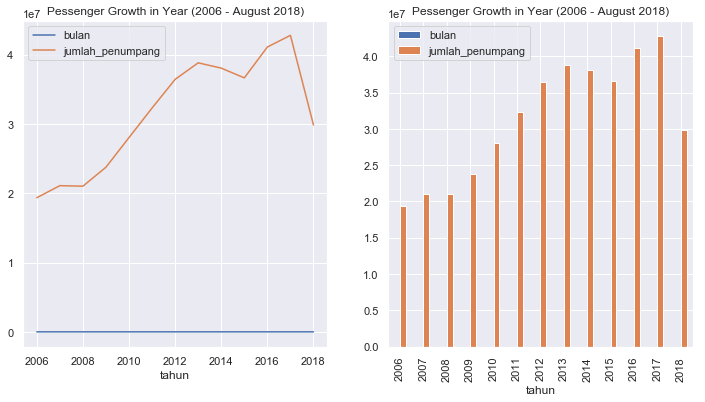

In [62]:
plt.figure(figsize=(12, 6))

ax = plt.subplot(1, 2, 1)
pessenger_growth_in_year.plot(kind="line", ax = ax)
plt.title("Pessenger Growth in Year (2006 - August 2018)")

ax = plt.subplot(1, 2, 2)
pessenger_growth_in_year.plot(kind="bar", ax = ax)
plt.title("Pessenger Growth in Year (2006 - August 2018)")

Text(0.5, 1.0, 'Total Pessenger in Airport')

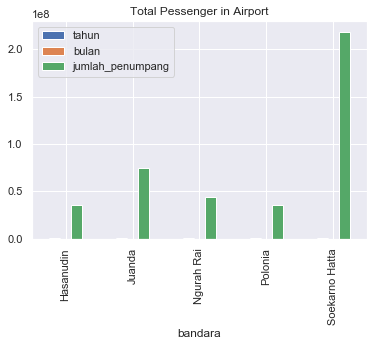

In [63]:
most_used_airport.plot(kind="bar")
plt.title("Total Pessenger in Airport")

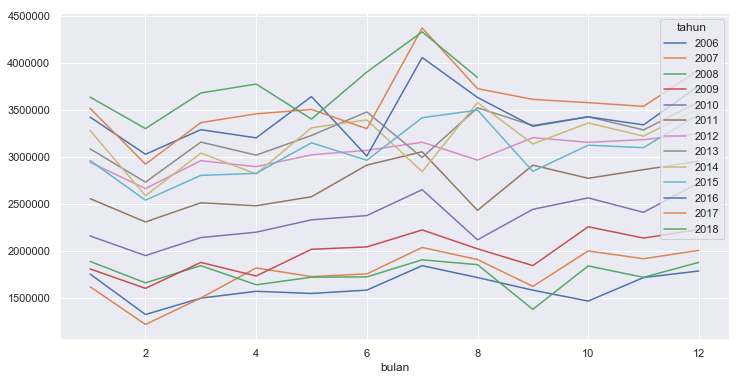

In [64]:
plt.figure(figsize=(12, 6))
ay = plt.subplot(1, 1, 1)

pessenger_growth_in_month.plot(ax = ay)

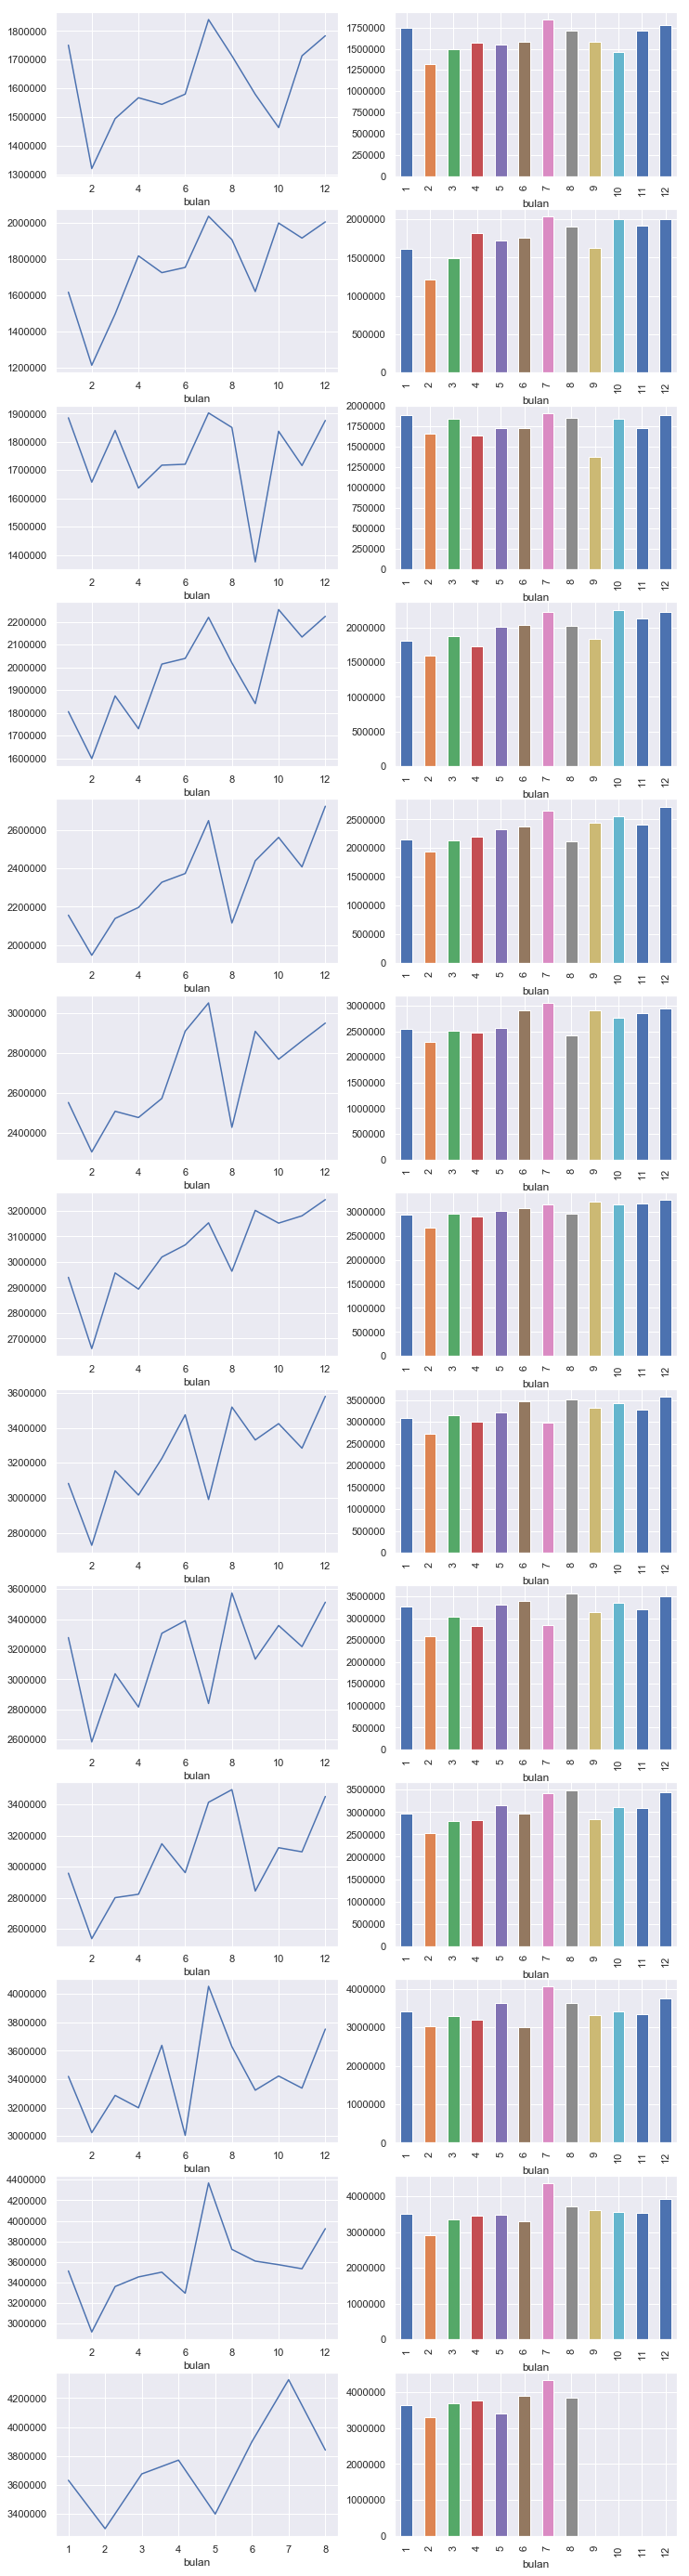

In [65]:
plt.figure(figsize=(12, 50))

base = 2006
num = 0

for i in range(0, 13):
    num += 1
    
    az = plt.subplot(13, 2, num)
    pessenger_growth_in_month[base + i].plot(ax=az)
    
    num += 1
    az = plt.subplot(13, 2, num)
    pessenger_growth_in_month[base + i].plot(kind="bar", ax=az)
    


### 5. Descriptive Analysis



### 6. Future Work

* Add more dataset to gain more insight
* Add 